In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
PATH = '/content/drive/MyDrive/DS102 - LAB/LAB-2025/LAB5/'

In [68]:
img = cv2.imread(PATH + 'zebra.jpg')

array([[[123, 188, 167],
        [103, 175, 153],
        [ 97, 181, 156],
        ...,
        [134, 186, 186],
        [139, 191, 191],
        [136, 188, 188]],

       [[130, 192, 174],
        [110, 179, 158],
        [103, 185, 162],
        ...,
        [134, 193, 189],
        [135, 194, 190],
        [132, 191, 187]],

       [[143, 198, 183],
        [123, 185, 169],
        [115, 191, 173],
        ...,
        [122, 197, 189],
        [119, 194, 186],
        [116, 191, 183]],

       ...,

       [[ 95, 155, 154],
        [ 91, 154, 152],
        [ 86, 149, 147],
        ...,
        [ 87, 149, 149],
        [ 95, 157, 157],
        [108, 170, 170]],

       [[112, 166, 167],
        [ 98, 152, 153],
        [ 93, 147, 148],
        ...,
        [103, 158, 155],
        [121, 176, 173],
        [135, 190, 187]],

       [[171, 212, 221],
        [152, 194, 201],
        [137, 181, 188],
        ...,
        [126, 175, 167],
        [143, 192, 184],
        [142, 191, 183]]], dtype=uint8)
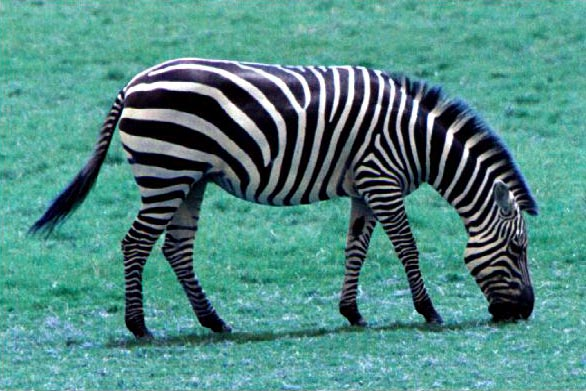

In [69]:
img
# ndarray(height, width, 3) (pixel) (do ảnh có màu), nếu là ảnh xám thì (height, width)

In [70]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # cv2.imread() đọc ảnh màu theo thứ tự BGR, KHÔNG phải RGB nên phải chuyển về RGB

array([[[167, 188, 123],
        [153, 175, 103],
        [156, 181,  97],
        ...,
        [186, 186, 134],
        [191, 191, 139],
        [188, 188, 136]],

       [[174, 192, 130],
        [158, 179, 110],
        [162, 185, 103],
        ...,
        [189, 193, 134],
        [190, 194, 135],
        [187, 191, 132]],

       [[183, 198, 143],
        [169, 185, 123],
        [173, 191, 115],
        ...,
        [189, 197, 122],
        [186, 194, 119],
        [183, 191, 116]],

       ...,

       [[154, 155,  95],
        [152, 154,  91],
        [147, 149,  86],
        ...,
        [149, 149,  87],
        [157, 157,  95],
        [170, 170, 108]],

       [[167, 166, 112],
        [153, 152,  98],
        [148, 147,  93],
        ...,
        [155, 158, 103],
        [173, 176, 121],
        [187, 190, 135]],

       [[221, 212, 171],
        [201, 194, 152],
        [188, 181, 137],
        ...,
        [167, 175, 126],
        [184, 192, 143],
        [183, 191, 142]]], dtype=uint8)
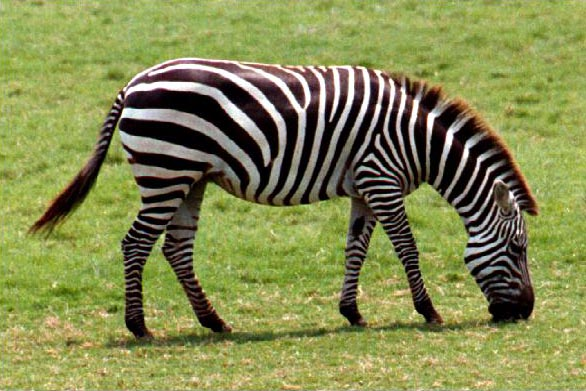

In [71]:
img

In [72]:
img_array = np.array(img)

In [73]:
h, w, c = img.shape

In [74]:
X = img_array.reshape(-1, 3) # (số mẫu, số đặc trưng)

In [75]:
X.shape

(229126, 3)

**Ý tưởng**
Mục tiêu: Tách foreground (đối tượng chính) khỏi background (nền).

Giả định:

- Màu sắc nền và vật thể có thể được mô hình hóa bằng phân phối xác suất

- Pixel có màu tương tự nhau thì thuộc cùng một cụm

- Mỗi pixel là 1 sample.

In [76]:
gmm = GaussianMixture(
    n_components = 3, # số cụm là 3
    random_state = 42,
    covariance_type = 'full' # mỗi cụm có ma trận hiệp psai khác nhau
)

In [77]:
gmm.fit(X)

GaussianMixture(n_components=3, random_state=42)

In [78]:
labels = gmm.predict(X)

In [79]:
unique, counts = np.unique(labels, return_counts=True) # các cụm
background_label = unique[np.argmax(counts)] # các điểm trong cụm nền (là cụm có nhiều pixel nhất)

In [80]:
foreground = img_array.copy().reshape(-1, 3)
foreground[labels == background_label] = [255, 255, 255] # gán màu trắng cho các pixel được dự đoán là nền

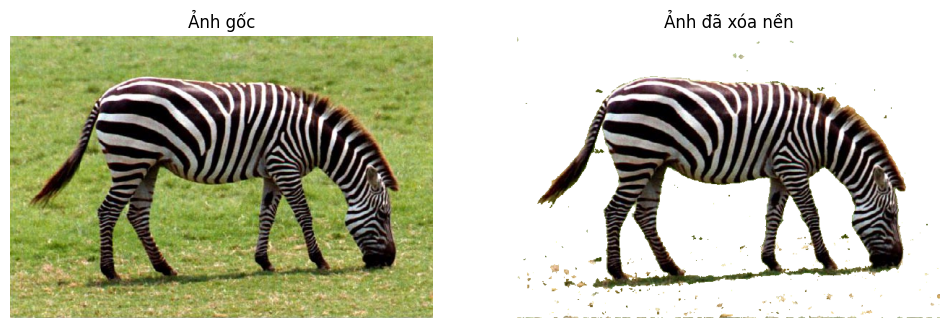

In [81]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Ảnh gốc")
plt.imshow(img_array)
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Ảnh đã xóa nền")
plt.imshow(foreground.reshape(h, w, c))
plt.axis("off")

plt.show()


In [82]:
gmm = GaussianMixture(
    n_components=3,
    random_state=42,
    covariance_type='tied' # ma trận hiệp psai là như nhau cho các cụm
)

In [83]:
gmm.fit(X)

GaussianMixture(covariance_type='tied', n_components=3, random_state=42)

In [84]:
labels = gmm.predict(X)

In [85]:
# cụm nền
unique, counts = np.unique(labels, return_counts=True)
background_label = unique[np.argmax(counts)]
foreground = img_array.copy().reshape(-1, 3)
foreground[labels == background_label] = [255, 255, 255]

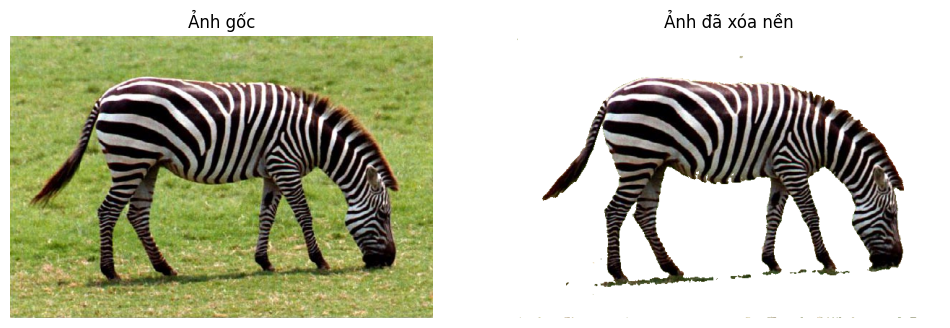

In [86]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Ảnh gốc")
plt.imshow(img_array)
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Ảnh đã xóa nền")
plt.imshow(foreground.reshape(h, w, c))
plt.axis("off")

plt.show()


In [87]:
foreground_3 = foreground.copy()

#### Thử tăng K

In [88]:
gmm = GaussianMixture(
    n_components=5,
    random_state=42,
    covariance_type='tied' # ma trận hiệp psai là như nhau cho các cụm
)
gmm.fit(X)
labels = gmm.predict(X)

# cụm nền
unique, counts = np.unique(labels, return_counts=True)
background_label = unique[np.argmax(counts)]
foreground = img_array.copy().reshape(-1, 3)
foreground[labels == background_label] = [255, 255, 255]


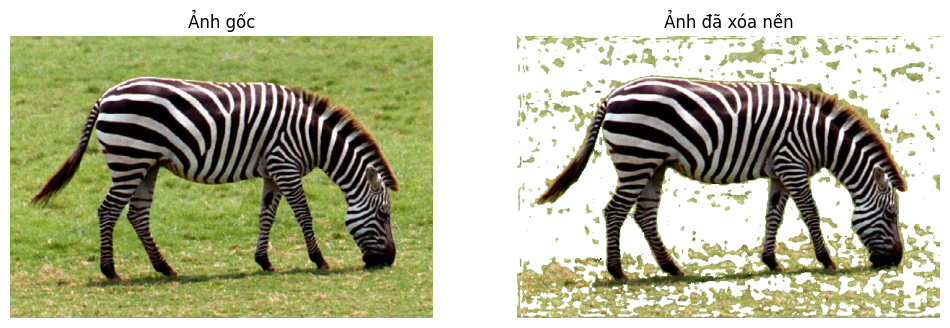

In [89]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Ảnh gốc")
plt.imshow(img_array)
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Ảnh đã xóa nền")
plt.imshow(foreground.reshape(h, w, c))
plt.axis("off")

plt.show()

Khi n_components lớn thì nên chia thành nhiều loại: nền sáng, nền tối, nền bóng, nền noise. Nên tăng components có thể sẽ nhầm các gaussian còn lại là foreground -> còn lốm đốm.

#### Thử giảm K

In [90]:
gmm = GaussianMixture(
    n_components=2,
    random_state=42,
    covariance_type='tied' # ma trận hiệp psai là như nhau cho các cụm
)
gmm.fit(X)
labels = gmm.predict(X)

# cụm nền
unique, counts = np.unique(labels, return_counts=True)
background_label = unique[np.argmax(counts)]
foreground = img_array.copy().reshape(-1, 3)
foreground[labels == background_label] = [255, 255, 255]

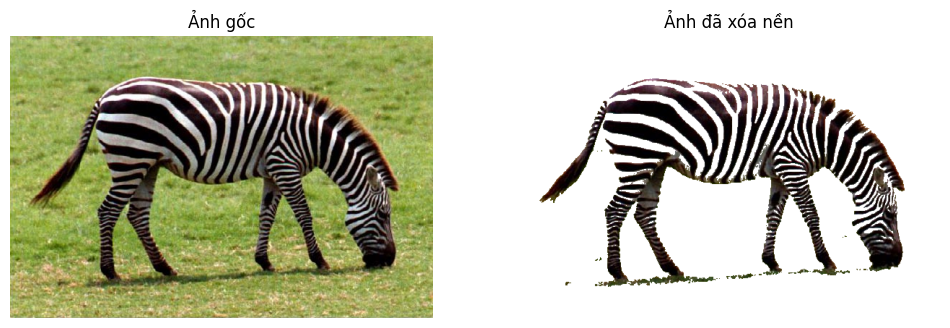

In [91]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Ảnh gốc")
plt.imshow(img_array)
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Ảnh đã xóa nền")
plt.imshow(foreground.reshape(h, w, c))
plt.axis("off")

plt.show()

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
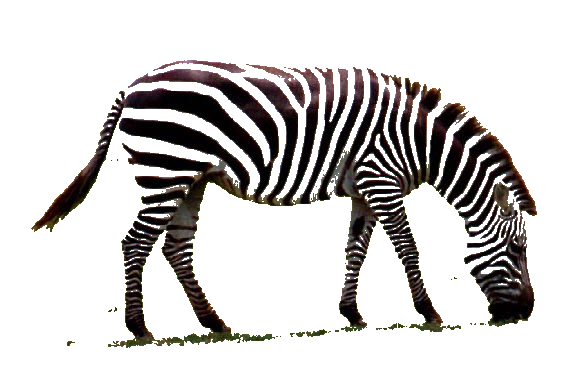

In [92]:
foreground.reshape(h, w, c)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
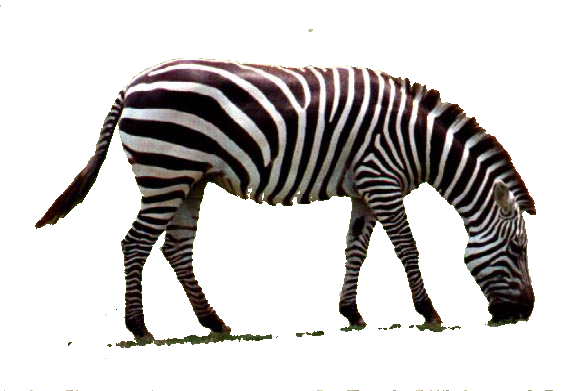

In [95]:
foreground_3.reshape(h, w, c)

Giảm K = 2 -> sắc độ, ánh sáng lên con ngựa vằn (foreground) ít hơn K = 3 do số cụm chỉ định ít -> số gaussian ít nên các pixel có sắc độ ít khác biệt dễ bị gộp lại -> k = 3 là tối ưu nhất.

In [97]:
foreground_3 = cv2.cvtColor(foreground_3.reshape(h, w, c), cv2.COLOR_BGR2RGB)
cv2.imwrite(PATH + "zebra-bgremoved.png", foreground_3)

True